<a href="https://colab.research.google.com/github/Aravsharma1/PredictingAirlineSatisfaction/blob/main/AirlinesatisifactionRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# all models that are going to be imported
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import jovian
%matplotlib inline
#in the final submission remove the jovian library

In [ ]:
raw_df = pd.read_csv('train.csv')
#print("all ok")

In [ ]:
raw_df.head()  # Checking first 5 rows

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [ ]:
raw_df.head().T

0  \
Unnamed: 0                                               0   
id                                                   70172   
Gender                                                Male   
Customer Type                               Loyal Customer   
Age                                                     13   
Type of Travel                             Personal Travel   
Class                                             Eco Plus   
Flight Distance                                        460   
Inflight wifi service                                    3   
Departure/Arrival time convenient                        4   
Ease of Online booking                                   3   
Gate location                                            1   
Food and drink                                           5   
Online boarding                                          3   
Seat comfort                                             5   
Inflight entertainment                                   5   
On-board service                                         4   
Leg room service                                         3   
Baggage handling                                         4   
Checkin service                                          4   
Inflight service                                         5   
Cleanliness                                              5   
Departure Delay in Minutes                              25   
Arrival Delay in Minutes                              18.0   
satisfaction                       neutral or dissatisfied   

                                                         1                2  \
Unnamed: 0                                               1                2   
id                                                    5047           110028   
Gender                                                Male           Female   
Customer Type                            disloyal Customer   Loyal Customer   
Age                                                     25               26   
Type of Travel                             Business travel  Business travel   
Class                                             Business         Business   
Flight Distance                                        235             1142   
Inflight wifi service                                    3                2   
Departure/Arrival time convenient                        2                2   
Ease of Online booking                                   3                2   
Gate location                                            3                2   
Food and drink                                           1                5   
Online boarding                                          3                5   
Seat comfort                                             1                5   
Inflight entertainment                                   1                5   
On-board service                                         1                4   
Leg room service                                         5                3   
Baggage handling                                         3                4   
Checkin service                                          1                4   
Inflight service                                         4                4   
Cleanliness                                              1                5   
Departure Delay in Minutes                               1                0   
Arrival Delay in Minutes                               6.0              0.0   
satisfaction                       neutral or dissatisfied        satisfied   

                                                         3                4  
Unnamed: 0                                               3                4  
id                                                   24026           119299  
Gender                                              Female             Male  
Customer Type                               Loyal Customer   Loyal Customer  

In [ ]:
raw_df.shape

(103904, 25)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:

raw_df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
raw_df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [ ]:
raw_df.describe().T

count          mean           std   min  \
Unnamed: 0                         103904.0  51951.500000  29994.645522   0.0   
id                                 103904.0  64924.210502  37463.812252   1.0   
Age                                103904.0     39.379706     15.114964   7.0   
Flight Distance                    103904.0   1189.448375    997.147281  31.0   
Inflight wifi service              103904.0      2.729683      1.327829   0.0   
Departure/Arrival time convenient  103904.0      3.060296      1.525075   0.0   
Ease of Online booking             103904.0      2.756901      1.398929   0.0   
Gate location                      103904.0      2.976883      1.277621   0.0   
Food and drink                     103904.0      3.202129      1.329533   0.0   
Online boarding                    103904.0      3.250375      1.349509   0.0   
Seat comfort                       103904.0      3.439396      1.319088   0.0   
Inflight entertainment             103904.0      3.358158      1.332991   0.0   
On-board service                   103904.0      3.382363      1.288354   0.0   
Leg room service                   103904.0      3.351055      1.315605   0.0   
Baggage handling                   103904.0      3.631833      1.180903   1.0   
Checkin service                    103904.0      3.304290      1.265396   0.0   
Inflight service                   103904.0      3.640428      1.175663   0.0   
Cleanliness                        103904.0      3.286351      1.312273   0.0   
Departure Delay in Minutes         103904.0     14.815618     38.230901   0.0   
Arrival Delay in Minutes           103594.0     15.178678     38.698682   0.0   

                                        25%      50%       75%       max  
Unnamed: 0                         25975.75  51951.5  77927.25  103903.0  
id                                 32533.75  64856.5  97368.25  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                      414.00    843.0   1743.00    4983.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      3.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

In [ ]:
# Visualisation Setup

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# How many of each class are there in target column?
raw_df["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

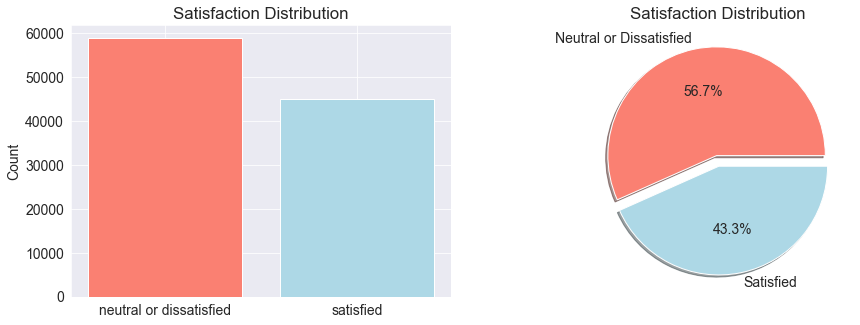

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# Plot 1
ax1.bar(raw_df["satisfaction"].value_counts().index, raw_df["satisfaction"].value_counts(),color=["salmon", "lightblue"])
ax1.set(title="Satisfaction Distribution",ylabel="Count")

# Plot 2
ax2.pie(raw_df["satisfaction"].value_counts(),colors=["salmon", "lightblue"],
        labels= ["Neutral or Dissatisfied", "Satisfied"] ,
        autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=0, shadow = True)
ax2.set(title="Satisfaction Distribution");

In [ ]:
#1. Customer Satisfaction Ratio with respect to Sex
# Sex ratio of Male and Female

raw_df['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [ ]:
# Compare target column with sex column

pd.crosstab(raw_df['Gender'], raw_df['satisfaction'])

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          30193      22534
Male                            28686      22491

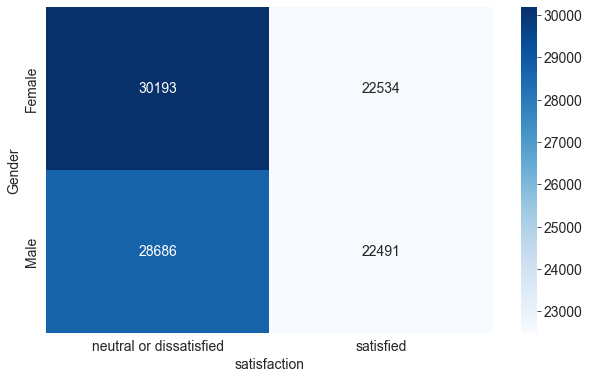

In [ ]:
# Visualise this crosstabulated data

sns.heatmap(pd.crosstab(raw_df['Gender'], raw_df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [ ]:
# Check the percentages

pd.crosstab(raw_df['Gender'], raw_df['satisfaction'], normalize=True)*100

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      29.058554  21.687327
Male                        27.608177  21.645942

In [ ]:
#2. Customer Satisfaction Ratio with respect to Customer Type
# Customer Type Ratio

raw_df['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [ ]:
# Crosstab Data

pd.crosstab(raw_df['Customer Type'], raw_df['satisfaction'])

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                       44390      40533
disloyal Customer                    14489       4492

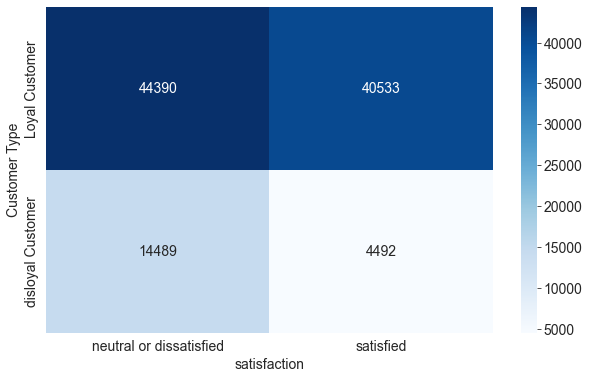

In [ ]:
# Visualise this crosstabulated data

sns.heatmap(pd.crosstab(raw_df['Customer Type'], raw_df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [ ]:
# Check the percentages

pd.crosstab(raw_df['Customer Type'], raw_df['satisfaction'], normalize=True)*100

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   42.722128  39.010048
disloyal Customer                13.944603   4.323221

In [ ]:
#3. Customer Satisfaction variation with respect to Age


In [ ]:
px.histogram(raw_df,
             x='Age',
             title='Age vs Satisfaction Ratio',
             marginal='box',
             color='satisfaction')

In [ ]:
#4. Customer Satisfaction variation with respect to Type of Travel

In [ ]:
# Type of Travel Ratio

raw_df['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

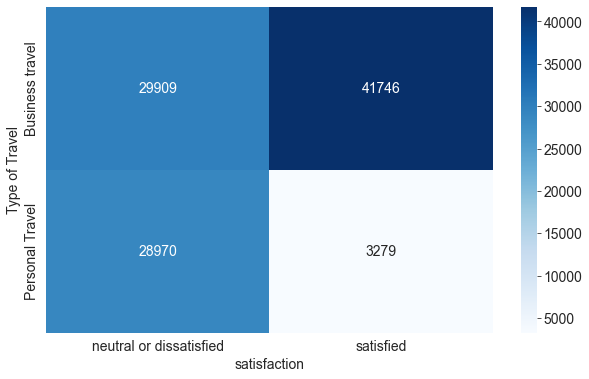

In [ ]:
# Visualise this crosstab data

sns.heatmap(pd.crosstab(raw_df['Type of Travel'], raw_df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [ ]:
# Check the percentages

pd.crosstab(raw_df['Type of Travel'], raw_df['satisfaction'], normalize=True)*100

satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                28.785225  40.177472
Personal Travel                27.881506   3.155798

In [ ]:
# Type of Class Ratio

raw_df['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

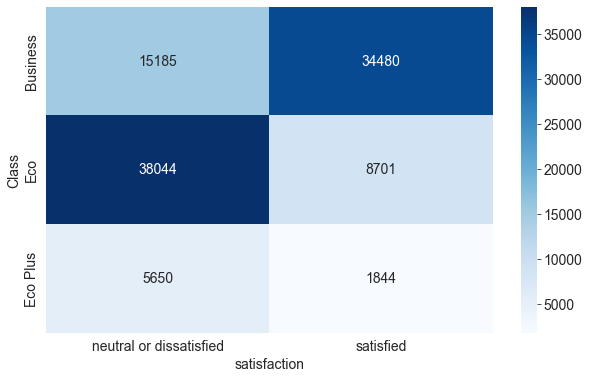

In [ ]:
# Visualise this crosstab data

sns.heatmap(pd.crosstab(raw_df['Class'], raw_df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [ ]:
# Check the percentages

pd.crosstab(raw_df['Class'], raw_df['satisfaction'], normalize=True)*100

satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    14.614452  33.184478
Eco                         36.614567   8.374076
Eco Plus                     5.437712   1.774715

In [ ]:
#6. Customer Satisfaction variation with respect to Customer Inputb

In [ ]:
customer_input_list = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

In [ ]:
def plot_func(a,b):
    for category in customer_input_list[a:b]:
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        sns.countplot(x=raw_df[category],palette="Pastel1")

        plt.subplot(1,2,2)
        sns.countplot(x=raw_df[category],hue=raw_df['satisfaction'], palette='Blues')
        plt.show()

In [ ]:
#**6.1 For first three category**

#1. Inflight wifi service
#2. Departure/Arrival time convenient
#3. Ease of Online booking
#4. Gate location

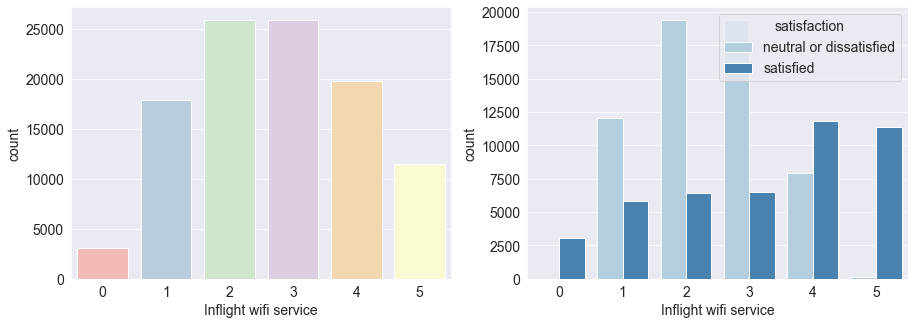

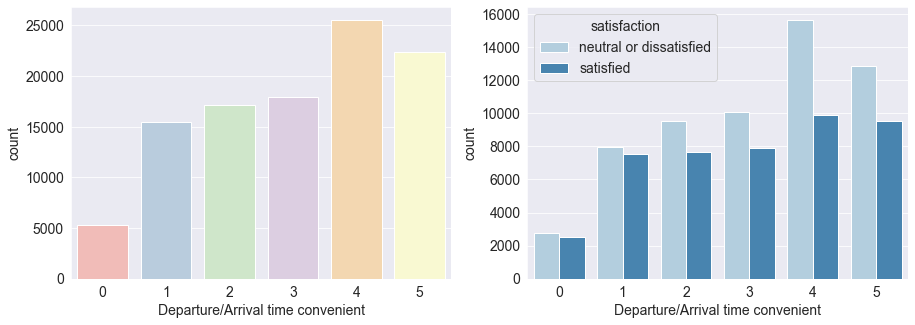

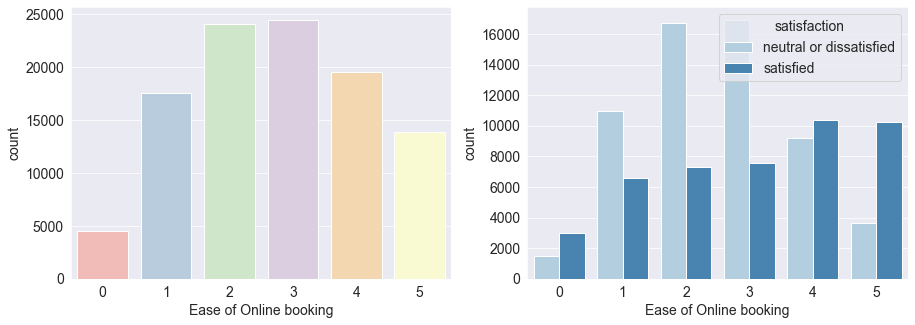

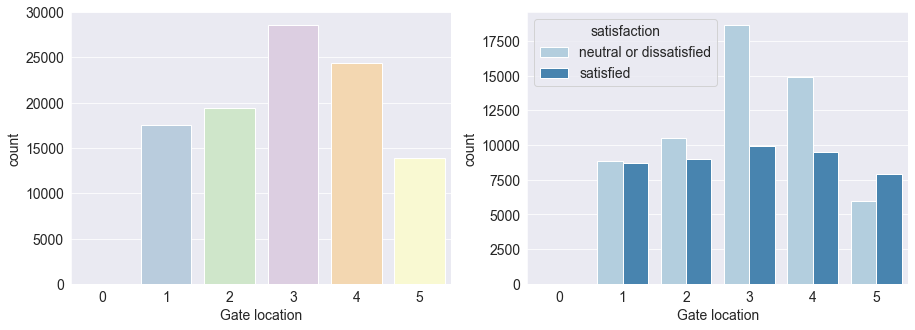

In [ ]:
plot_func(0,4)

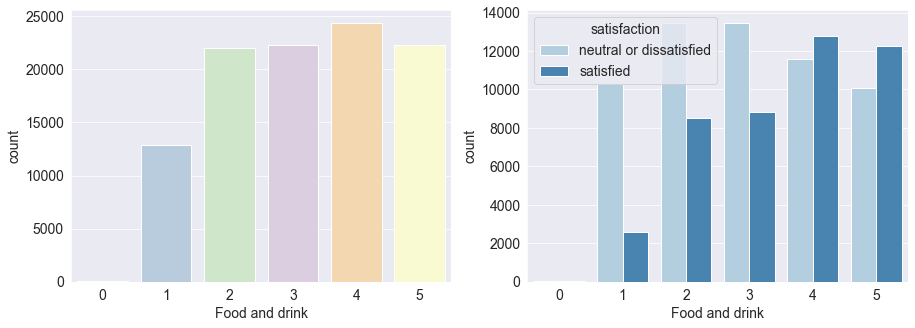

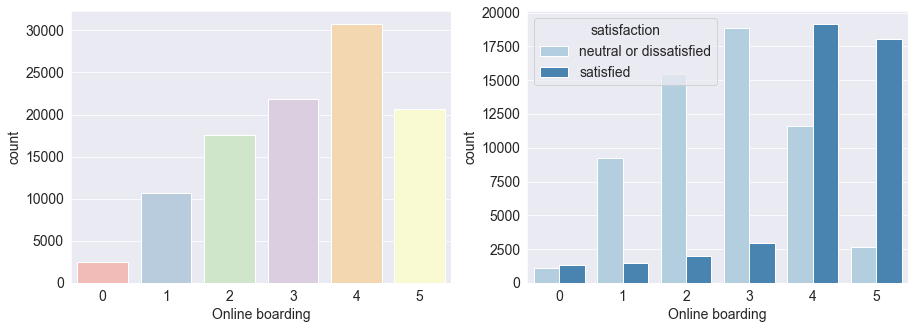

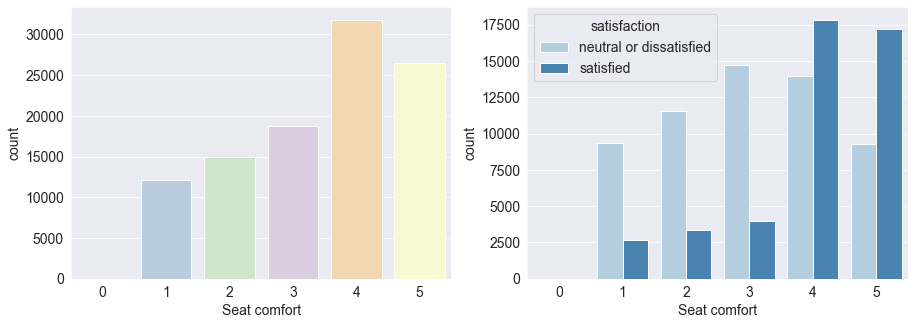

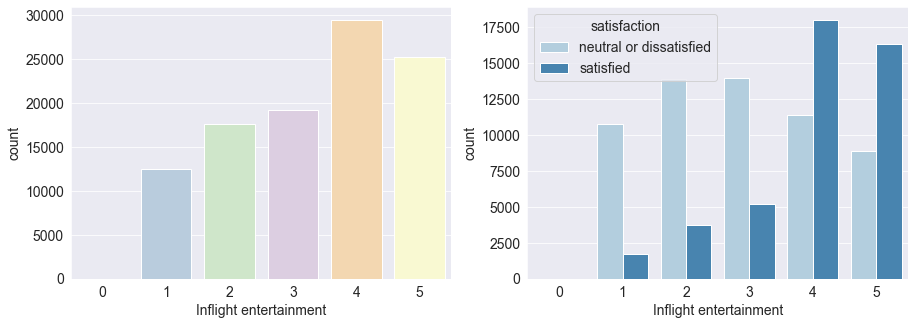

In [ ]:
plot_func(4,8)

In [ ]:
#Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Performing One Hot Encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])
categorical_cols = inputs_df.select_dtypes(include=['object']).columns.tolist()
input_cols = list(raw_df.columns)[2:-1]
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
inputs_df = raw_df[input_cols].copy()
# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)
# Checking the size of our splitted data

train_inputs.shape, val_inputs.shape, train_targets.shape, val_targets.shape


NameError: name 'categorical_cols' is not defined

In [ ]:
DTCmodel = DecisionTreeClassifier(random_state=42)
DTCmodel.fit(train_inputs, train_targets) # before you do this you need to split and then train the
# datasset and create a validation set; code is below the importing stuff.
DTCmodel.score(train_inputs, train_targets)